In [1]:
import pandas as pd
import nannyml as nml
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

## 1. Let's load our reference and analysis datasets.

In [2]:
reference = pd.read_csv('data/reference.csv')
analysis = pd.read_csv('data/analysis.csv')

## 2. Let's turn the timestamp column into datetime dtype

In [3]:
reference['job_published_at'] = pd.to_datetime(reference['job_published_at'])
analysis['job_published_at'] = pd.to_datetime(analysis['job_published_at'])

## 3. Our datasets are ready to be checked with
- UnivariateDriftDetector, that detects univariate data drift
- DataReconstructionDriftCalculator, that detects multivariate data drift
- DomainClassifierCalculator, that detects multivariate data drift

In [4]:
ud_calc = nml.UnivariateDriftCalculator(
    column_names=reference.columns.to_list(),
    treat_as_categorical = ['hours', 'remote', 'education', 'seniority', 'country'],
    timestamp_column_name='job_published_at',
    continuous_methods=['kolmogorov_smirnov', 'jensen_shannon'],
    categorical_methods=['chi2', 'jensen_shannon'], 
)

In [5]:
ud_calc.fit(reference[:-2])
results = ud_calc.calculate(analysis)

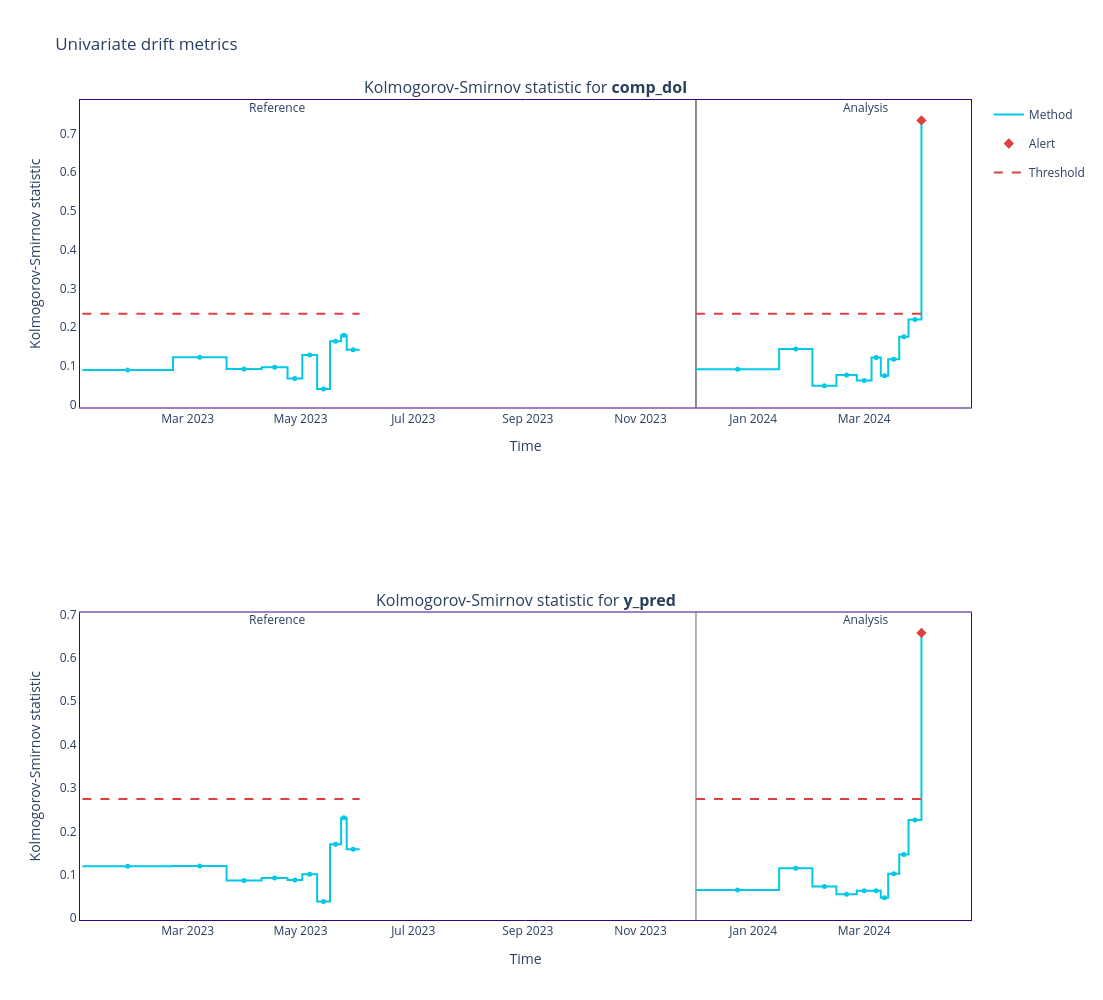

In [6]:
figure = results.filter(
    column_names=results.continuous_column_names, 
    methods=['kolmogorov_smirnov']
    ).plot(kind='drift')
figure.show()

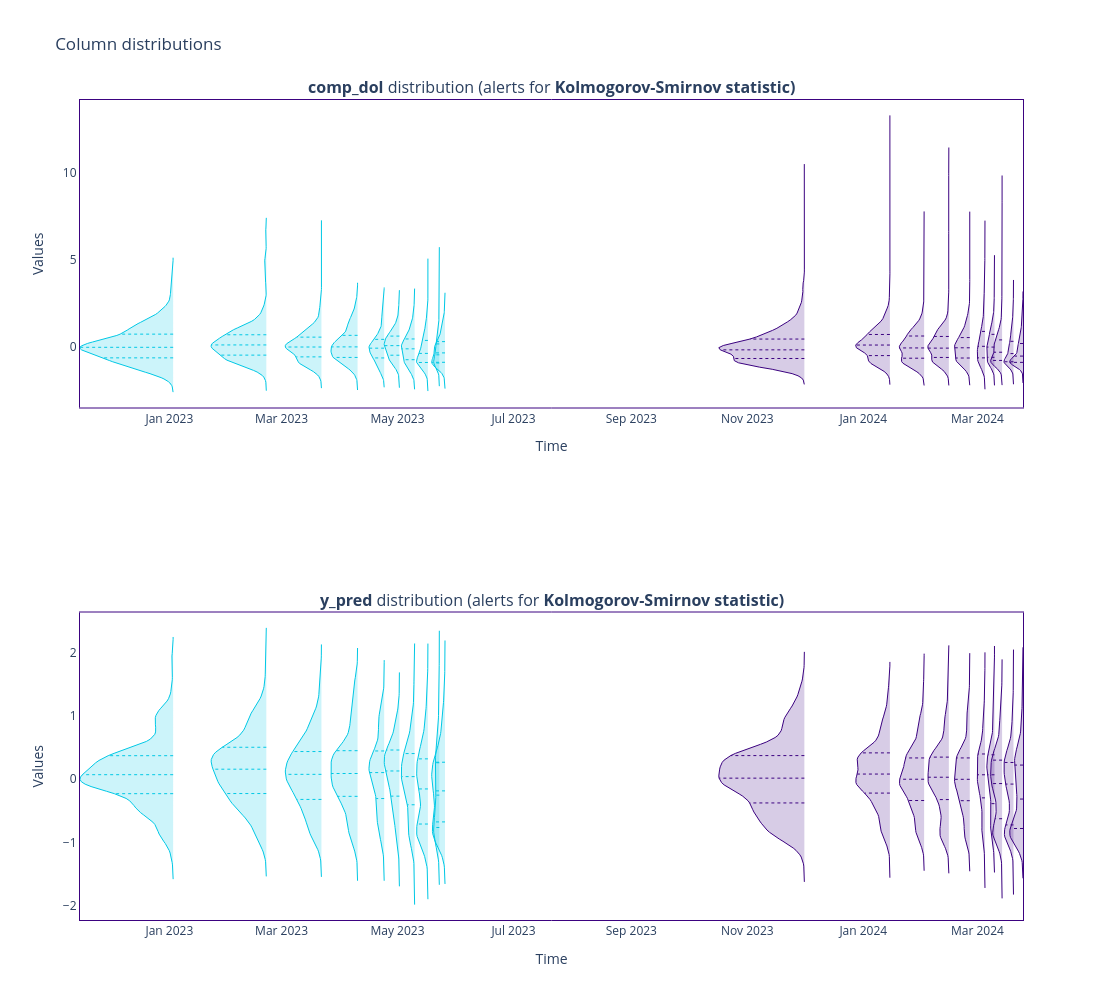

In [7]:
figure = results.filter(column_names=results.continuous_column_names, methods=['kolmogorov_smirnov']).plot(kind='distribution')
figure.show()

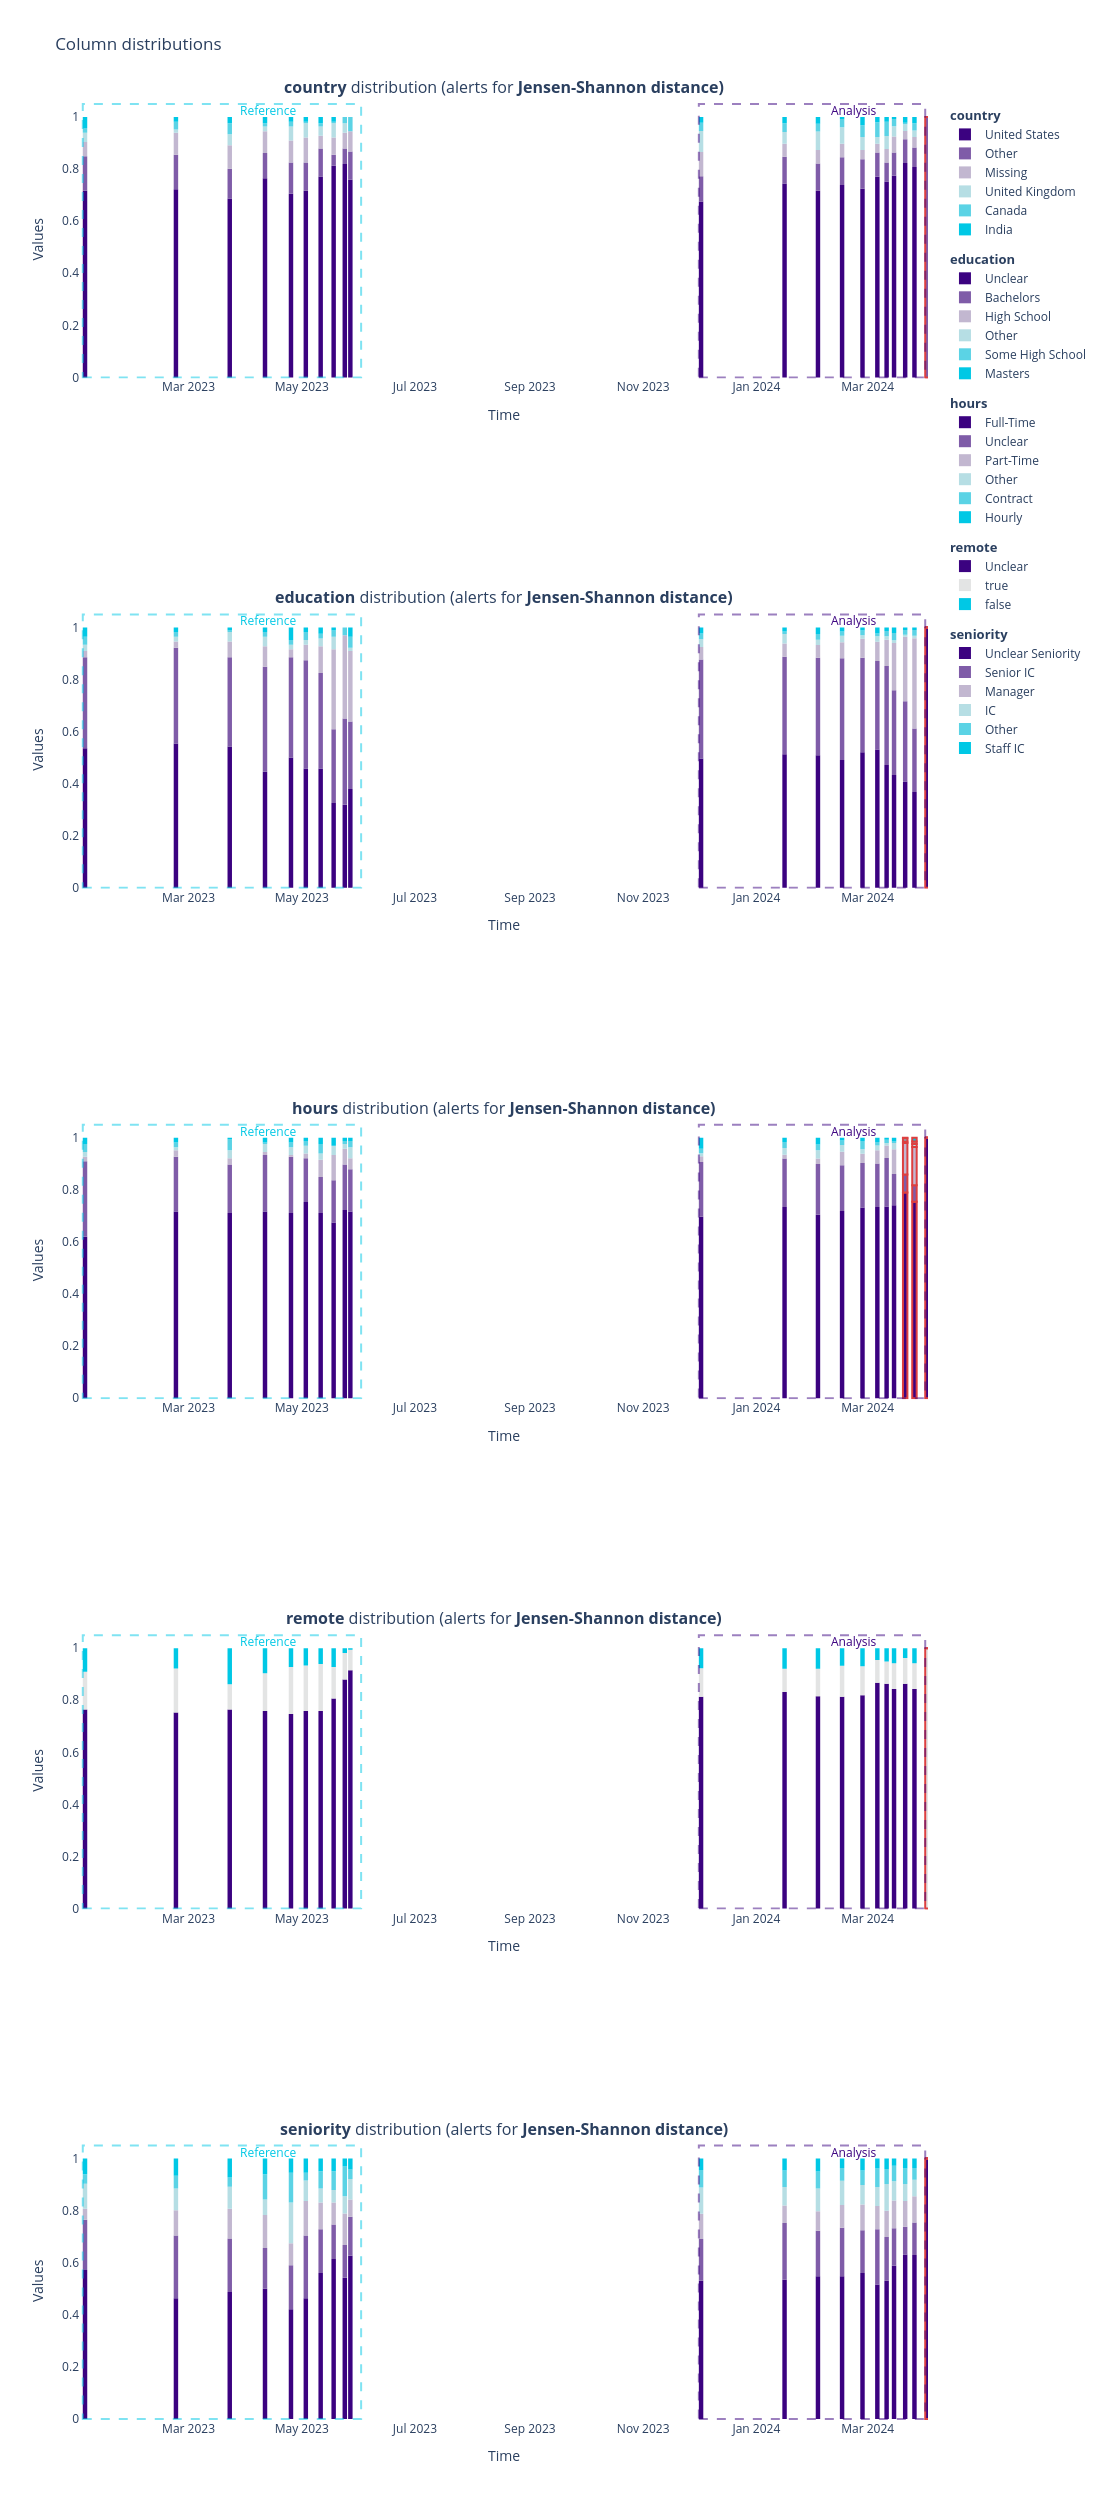

In [8]:
figure = results.filter(column_names=results.categorical_column_names, methods=['jensen_shannon']).plot(kind='distribution')
figure.show()

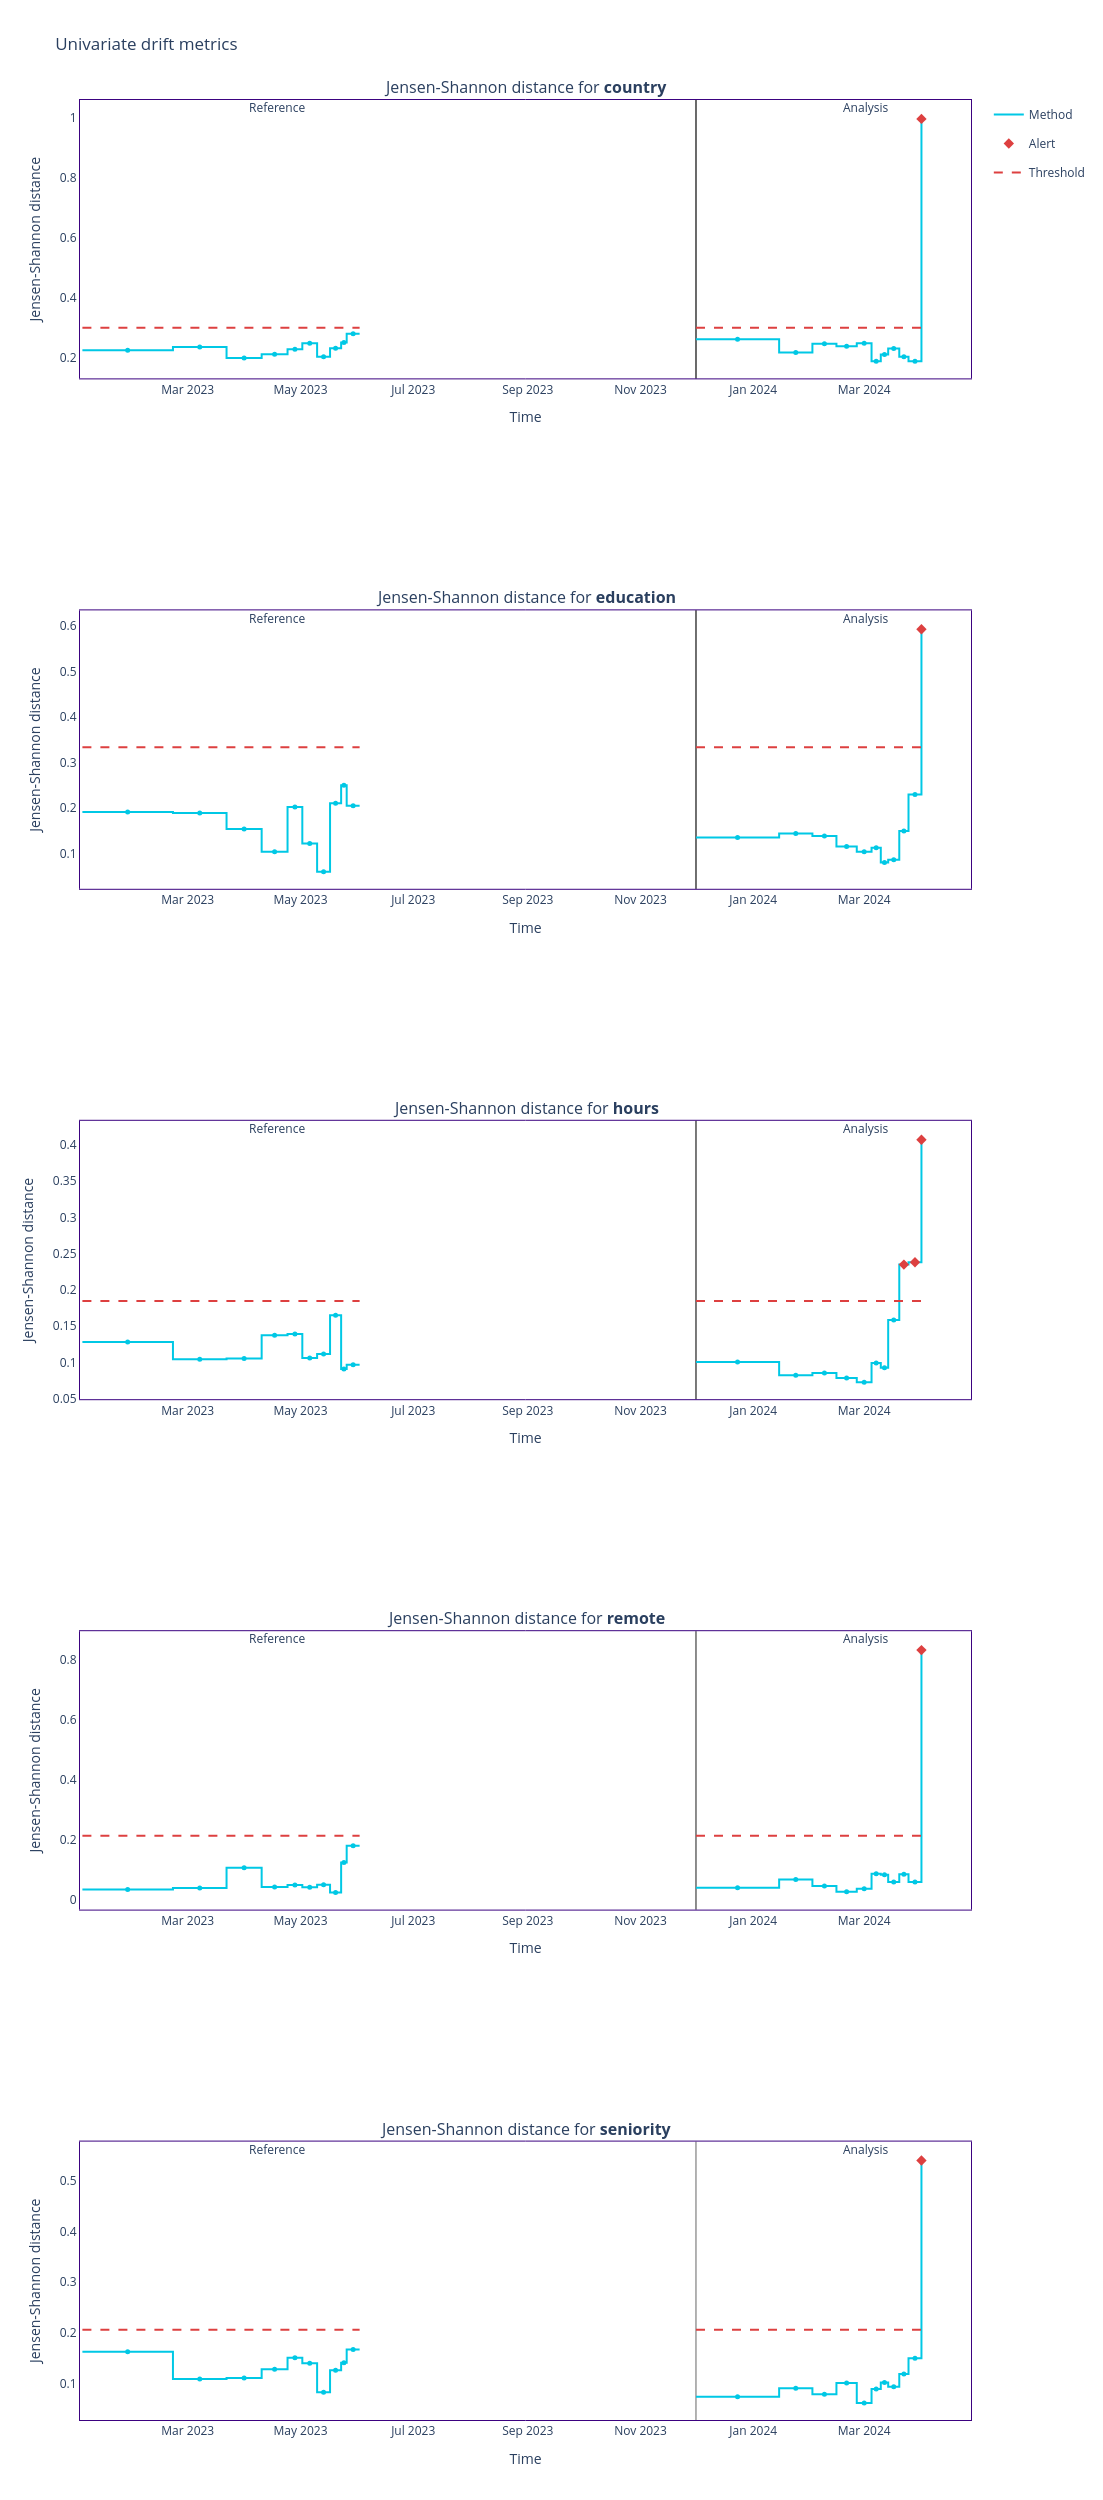

In [9]:
figure = results.filter(column_names=results.categorical_column_names, methods=['jensen_shannon']).plot(kind='drift')
figure.show()

In [10]:
drd_calc = nml.DataReconstructionDriftCalculator(
    column_names=reference.columns.to_list(),
    timestamp_column_name='job_published_at',
    chunk_size=500
)

In [11]:
reference['job_published_at']=reference['job_published_at'].astype('object')
analysis['job_published_at']=analysis['job_published_at'].astype('object')

In [12]:
drd_calc.fit(reference)
results = drd_calc.calculate(analysis)

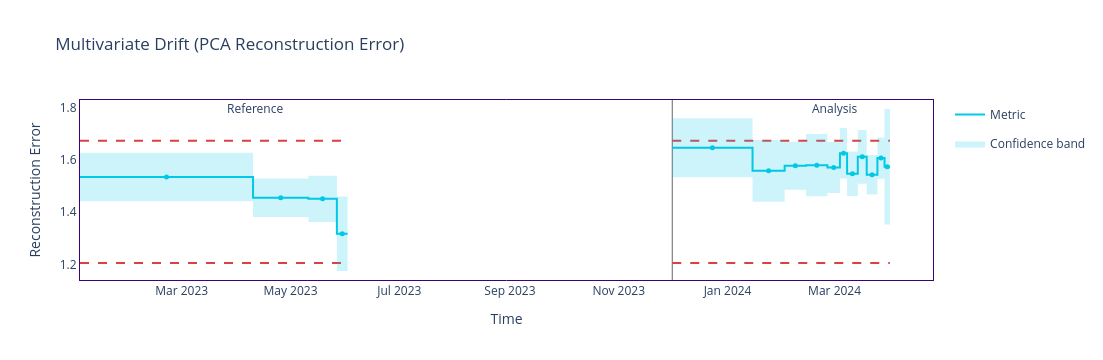

In [13]:
figure = results.plot()
figure.show()

In [14]:
dc_calc = nml.DomainClassifierCalculator(
    feature_column_names=['hours', 'remote', 'education', 'seniority', 'country'],
    timestamp_column_name='job_published_at',
    chunk_size=500
)

In [15]:
dc_calc.fit(reference)
results = dc_calc.calculate(analysis)

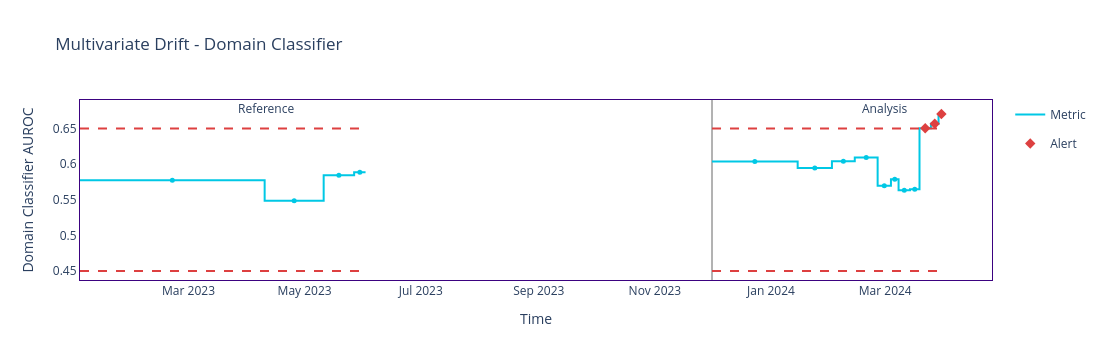

In [16]:
figure = results.plot()
figure.show()